In [2]:
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorrt as trt

In [3]:
tf.config.list_physical_devices('GPU')

2023-12-04 20:34:35.661345: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-04 20:34:35.721682: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-04 20:34:35.721720: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

tensorrt_bindings.tensorrt.DeviceType

In [8]:
dataset_folder = r".source/Waste Classification Dataset/Waste Classification Dataset/waste_dataset"

In [16]:
# classification of image using tensorflow

# load dataset

data = keras.preprocessing.image_dataset_from_directory(dataset_folder, image_size=(256, 256), batch_size=32)

# split dataset into train and test

train_dataset = data.take(80)
test_dataset = data.skip(80)

# build model

model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1. / 255),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2)
])

# compile model

model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# train model

model.fit(train_dataset, epochs=20, batch_size=128)

# evaluate model

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print('\nTest accuracy:', test_acc)

# predict model

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_dataset)

Found 24705 files belonging to 2 classes.
Epoch 1/20
80/80 [==============================] - 5s 43ms/step - loss: 0.5035 - accuracy: 0.7867
Epoch 2/20
80/80 [==============================] - 3s 43ms/step - loss: 0.3994 - accuracy: 0.8285
Epoch 3/20
80/80 [==============================] - 3s 43ms/step - loss: 0.3571 - accuracy: 0.8539
Epoch 4/20
80/80 [==============================] - 3s 42ms/step - loss: 0.2769 - accuracy: 0.8941
Epoch 5/20
80/80 [==============================] - 3s 42ms/step - loss: 0.2157 - accuracy: 0.9207
Epoch 6/20
80/80 [==============================] - 3s 42ms/step - loss: 0.1847 - accuracy: 0.9352
Epoch 7/20
80/80 [==============================] - 3s 42ms/step - loss: 0.1285 - accuracy: 0.9559
Epoch 8/20
80/80 [==============================] - 3s 42ms/step - loss: 0.1024 - accuracy: 0.9648
Epoch 9/20
80/80 [==============================] - 4s 45ms/step - loss: 0.0584 - accuracy: 0.9824
Epoch 10/20
80/80 [==============================] - 3s 43ms/step -

In [17]:
model.save("model.h5")
probability_model.save("probability_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


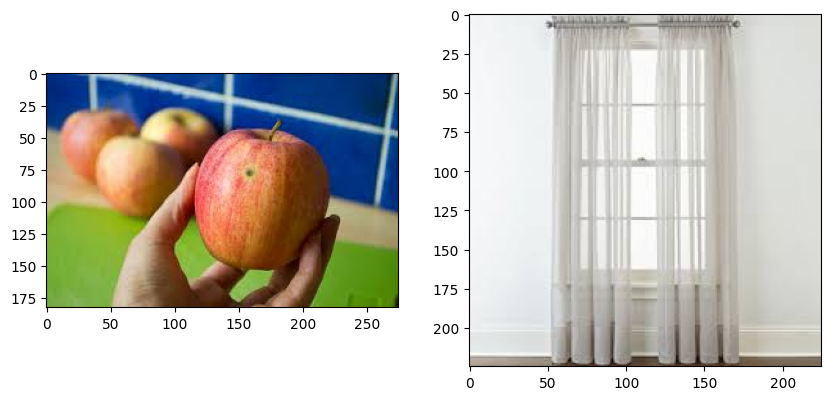

In [18]:
image_to_test_1 = r".source/Waste Classification Dataset/Waste Classification Dataset/waste_dataset/organic/organic_013946_photo.jpg"
image_to_test_2 = r".source/Waste Classification Dataset/Waste Classification Dataset/waste_dataset/recyclable/recyclable_011097_photo.jpg"
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(plt.imread(image_to_test_1))
plt.subplot(1, 2, 2)
plt.imshow(plt.imread(image_to_test_2))
plt.show()

In [20]:
# predict the label of these images

image_1 = keras.preprocessing.image.load_img(image_to_test_1, target_size=(256, 256))
image_2 = keras.preprocessing.image.load_img(image_to_test_2, target_size=(256, 256))
image_1 = keras.preprocessing.image.img_to_array(image_1)
image_2 = keras.preprocessing.image.img_to_array(image_2)
image_1 = np.array([image_1])
image_2 = np.array([image_2])

prediction_1 = probability_model.predict(image_1)
prediction_2 = probability_model.predict(image_2)

def labelisation(prediction):
    if prediction[0][0] > prediction[0][1]:
        return "organic"
    else:
        return "recyclable"

print("Prediction for image 1: ", labelisation(prediction_1))
print(prediction_1)
print("Prediction for image 2: ", labelisation(prediction_2))
print(prediction_2)

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
Prediction for image 1:  organic
[[0.99752694 0.00247311]]
Prediction for image 2:  recyclable
[[1.895097e-04 9.998105e-01]]
1/1 [==============================] - 0s 17ms/step
Prediction for image 1:  organic
[[0.99752694 0.00247311]]
Prediction for image 2:  recyclable
[[1.895097e-04 9.998105e-01]]
